# Exercises - Week 2 - Supervised Learning
#### Simon Lee, BIO-322, Machine Learning for Bioengineers, Winter 2022

# Conceptual

### Exercise 1

We have some training data $$((x_1 = 0, y_1 = -1), (x_2 = 2, y_2 = 4),(x_3 = 2, y_3 = 3))$$ and a family of probability densities

$$ 
(p(y|x) = \frac1{\sqrt{2\pi\sigma^2}}\exp\left(-\frac{(y - \theta_0 - \theta_1 x)^2}{2\sigma^2}\right))
$$
   
   - Write the log-likelihood function of the parameters $\theta_0$ and $\theta_1$
     for this data and model.
   - Find the parameters $\hat\theta_0$ and $\hat\theta_1$ that maximize the log-likelihood function. *Hint*: You do not need to solve for the optimal parameters analytically; compare the loss function you derived in the previous step to the one we obtained in the lecture in the first blackboard example and use the fact that we know the optimum for the blackboard example.
   - Show for general training data $((x_1, y_1), (x_2, y_2), \ldots, (x_n, y_n))$ that the log-likelihood function is maximized by the same $\hat\theta$ that minimizes the loss function of linear regression.

### Solution

$$
\begin{align}
\log \ell(\theta) &= \log\ell(\theta_0, \theta_1)\\
&=\sum_{i=1}^3\log p(y_i|x_i, \theta_0, \theta_1)\\
&=\sum_{i=1}^3\log\left(\frac1{\sqrt{2\pi\sigma^2}}\exp\left(-\frac{(y_i - \theta_0 - \theta_1 x_i)^2}{2\sigma^2}\right)\right)\\
&=\sum_{i=1}^3 - \log\left(\sqrt{2\pi\sigma^2}\right)-\frac{(y_i - \theta_0 - \theta_1 x_i)^2}{2\sigma^2}\\
&=-3\log\left(\sqrt{2\pi\sigma^2}\right) - \frac1{2\sigma^2}\big((-1 - \theta_0)^2 + (4 - \theta_0 - 2\theta_1)^2 + (3 - \theta_0 - 2\theta_1)^2\big)
\end{align}
$$
The maximum of this function is achieved at $\hat\theta_0 = -1, \hat\theta_1 = 2.25$.

In general we find the following:
$$
\begin{align}
\log \ell(\theta) &= \log\ell(\theta_0, \theta_1)\\
&=\sum_{i=1}^n\log p(y_i|x_i, \theta_0, \theta_1)\\
&=\sum_{i=1}^n\log\left(\frac1{\sqrt{2\pi\sigma^2}}\exp\left(-\frac{(y_i - \theta_0 - \theta_1 x_i)^2}{2\sigma^2}\right)\right)\\
&=\sum_{i=1}^n - \underbrace{\log\left(\sqrt{2\pi\sigma^2}\right)}_{[\scriptsize independent of data}]-\frac{(y_i - \theta_0 - \theta_1 x_i)^2}{2\sigma^2}\\
&=c-\frac1{2\sigma^2}\sum_{i=1}^n(y_i-\theta_0-\theta_1x_i)^2
\end{align}
$$
In the last line we introduced the constant $c = -\sum_{i=1}^n\log\left(\sqrt{2\pi\sigma^2}\right)$.
$$
\begin{align}
    \arg\max_{\theta_0, \theta_1}\log\ell(\theta_0, \theta_1) &= \arg\max_{\theta_0, \theta_1}c-\frac1{2\sigma^2}\sum_{i=1}^n(y_i-\theta_0-\theta_1x_i)^2\\
    &\scriptsize[we apply the rule: ]\arg\max_xf(x)+c=\arg\max_xf(x)\normalsize\\
    &=\arg\max_{\theta_0, \theta_1}-\frac1{2\sigma^2}\sum_{i=1}^n(y_i-\theta_0-\theta_1x_i)^2\\
    &\scriptsize\arg\max_x -f(x) = \arg\min_x f(x)\normalsize\\
    &=\arg\min_{\theta_0, \theta_1}\frac1{2\sigma^2}\sum_{i=1}^n(y_i-\theta_0-\theta_1x_i)^2\\
    &\scriptsize\arg\min_x af(x) =\arg\min_x bf(x)\normalsize\\
    &=\arg\min_{\theta_0, \theta_1}\frac1n\sum_{i=1}^n(y_i-\theta_0-\theta_1x_i)^2\\
\end{align}
$$
**Conclusion** We find that the maximum likelihood solution for this family of
    probability densities is equal to the solution of the mean-squared error
    minimizing machine.

### Exercise 2
   Explain whether each scenario is a classification or regression problem, and
   indicate whether we are most interested in inference/interpretation or prediction.
   Finally, provide $n$ and $p$.
   - We collect a set of data on the top 500 firms in the US. For each firm we
     record profit, number of employees, industry and the CEO salary. We are
     interested in understanding which factors affect CEO salary.
   - We are considering launching a new product and wish to know
     whether it will be a success or a failure. We collect data on 20
     similar products that were previously launched. For each product
     we have recorded whether it was a success or failure, price
     charged for the product, marketing budget, competition price,
     and ten other variables.
   - We are interested in predicting the % change in the USD/Euro
     exchange rate in relation to the weekly changes in the world
     stock markets. Hence we collect weekly data for all of 2012. For
     each week we record the % change in the USD/Euro, the %
     change in the US market, the % change in the British market,
     and the % change in the German market.

### Solution
1. Regression and inference with $n = 500$ and $p = 3$.
1. Classification and prediction with $n = 20$ and $p=13$.
2. Regression and prediction with $n = 52$ and $p = 3$.

### Exercise 3
Take one of the examples of supervised machine learning applications
   discussed in the introductory lecture of this course. Discuss with a colleague
   - the data generating process for X
   - the data generating process for Y|X
   - where the noise comes from
   - a distribution that could be used to model Y|X
   
### Solution
We take here the example of cancer detection.
1. The generating process of images X are healthy patients and patients that get cancer and a standardized protocol to optain microscopy images of human tissue.
2. The generating process of labels Y|X are doctors that look at the images and decide whether they see cancerous tissue in the center of the image.
3. We perceive as noise all the uncontrolled and unmeasured factors that influence the decision of each doctor, like their training, how attentive they are when looking at the images, etc.
4. This is a binary decision classification task that could be modeled with a Bernoulli distribution.
"

# Applied
#### Exercise 4
In this exercise we construct an example, where the response looks noisy, if we consider only some predictors, although the response would be deterministic if we consider all predictors. For this example we assume that the time it takes for a feather to reach the ground when dropping it from one meter is completely determined by the following factors: fluffiness of the feather ($f \in [1, 4]$), shape of the feather ($s = \{[s, e]\}$, for spherical or elongated), air density ($ρ ∈ [1.1, 1.4]$ kg/m³), wind speed ($w ∈ [0, 5]$ m/s). We assume that time it takes to reach the ground is deterministically given by the function
$$
g(f, s, ρ, w) = ρ + 0.1f^2 + 0.3w + 2χ(s = [s]) + 0.5χ(s = [e])
$$
where we use the indicator function $χ([true]) = 1$ and $χ([false]) = 0$.
1. Generate an artificial dataset that corresponds to 500 experiments of dropping different feathers under different conditions. *Hints:* you can sample from a uniform distribution over the interval $[a, b]$ using either $rand(500)*(b-a) .+ a$ or $rand(Uniform(a, b), 500)$ and you can sample categorical values in the same way as we did it in the first week when sampling column C in exercise 1. To implement the indicator function you can use for example the syntax $(s == :s)$ and $(s == :e)$.
2. Create a scatter plot with fluffiness of the feather on the horizontal axis and time to reach the ground on the vertical axis.
3. Argue, why it looks like the time to reach the ground depended probabilistically on the fluffiness, although we used a deterministic function to compute the time to reach the ground. *Optional*: If you feel courageous, use a mathematical argument (marginalization) that uses the fact that $P(t|f, s, \rho, w) = \delta(t - g(f, s, \rho, w))$ is deterministic and shows that $P(t|f)$ is a non-degenerate conditional distribution.

In [17]:
using Pkg; Pkg.activate(joinpath(Pkg.devdir(), "MLCourse")) # loads the course environment

  Activating project at `~/.julia/dev/MLCourse`


In [18]:
using Distributions, Plots, DataFrames

In [19]:
g(f, s, rho, w) = rho + .1f^2 + .3w + 2*(s == :s) + .5*(s == :e)

g (generic function with 1 method)

In [20]:
data = DataFrame(f = rand(Uniform(1, 4), 500),
                 s = rand((:s, :e), 500),
                 rho = rand(Uniform(1.1, 1.4), 500),
                 w = 5*rand(500))

,f,s,rho,w
,Float64,Symbol,Float64,Float64
1,1.71213,e,1.31077,3.62116
2,3.7785,e,1.26677,1.35986
3,3.80902,e,1.39507,1.799
4,1.10381,s,1.23718,1.95716
5,1.28572,e,1.35439,1.84497
6,2.3265,e,1.32077,3.41436
7,2.83105,s,1.15269,1.08656
8,2.51909,s,1.17356,1.93425
9,2.82988,s,1.35235,1.75226


In [21]:
data.time = g.(data.f, data.s, data.rho, data.w)

500-element Vector{Float64}:
 3.190259449386474
 3.6024375848670163
 3.885626673368015
 3.9461627643241446
 2.5731886479081534
 3.3863385575093177
 4.2801396562035325
 4.388415440270556
 4.678845511531167
 5.814717305957118
 2.374321837347618
 4.771434833755717
 3.137170089888219
 ⋮
 3.365640163362621
 5.790875903183446
 4.437232952842271
 2.7394777413161684
 4.792832091791558
 4.167930390244663
 3.9241994798099187
 4.3572177287159075
 6.218188647427262
 6.245271092881249
 4.838445250277044
 3.4558171149520405

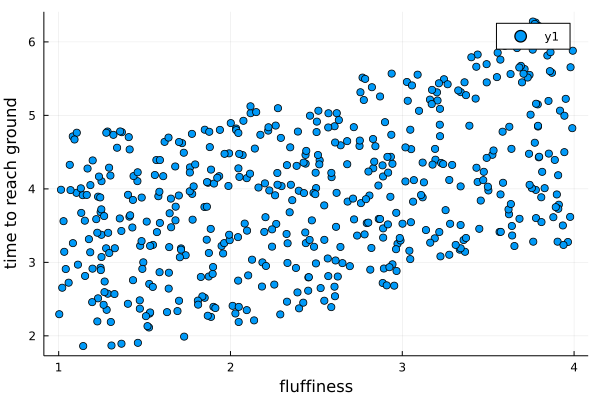

In [22]:
scatter(data.f, data.time, xlabel = "fluffiness", ylabel = "time to reach ground")

Although the time to reach the ground is a deterministic function of the predictors $f, s, ρ, w$, it is more natural to model the relationship between the time $t$ and the fluffiness $f$ alone as a conditional probability distribution which is obtained by marginalizing $s, \rho, w$, i.e.
$$
\begin{align}
P(t|f) &= \sum_s\int d\rho\int dw P(t|f, s, \rho, w)P(s)P(\rho)P(w)\\
&= \sum_{s \in\{[s, e]\}}\int_{1.1}^{1.4}d\rho\int_{0}^5dw\, \delta\big(t - g(f, s, \rho, w)\big)\frac12\frac1{0.3}\frac15
\end{align}
$$
where $\delta(x)$ is the Dirac delta distribution.

#### Exercise 5
Change the noise level $\sigma$, the size of the training data $n$ and the seed with the sliders of the section "Linear Regression" and observe the training and the test losses. Write down your observations when
- $n$ is small.
- $n$ is large.
- Compare training loss and test loss when $n$ is large for different seed values.
- Compare for large $n$ the test error to $\sigma^2$ for different values of $\sigma$.

### Solution
1. For low number $n$ of training points the training error is typically much lower than the test error.
2. For large number $n$ of training points the training error and the test error are almost equally large.
3. For large number $n$ of training points the training arror is lower than the test error for some random number seeds and higher for others.
4. For large number $n$ of training points the training and the test error are approximately $\sigma^2$

#### Exercise 6
Write a data generator function that samples inputs $x$ normally distributed
   with mean 2 and standard deviation 3. The response $ y\in\{ [true, false] $
   should be sampled from a Bernoulli distribution with rate of $[true]$
   equal to $ \sigma(0.5x - 2.7) $ where $ \sigma(x) = 1/(1 + e^{-x}) $ is the sigmoid (or logistic) function.
   - Create a training set of size $n = 20$.
   - Fit the data with logistic regression.
   - Look at the fitted parameters.
   - Predict the probability of class `true` on the training input.  *Hint*: use the `pdf` function.
   - Determine the class with highest predicted probability and compare the result to the labels of the training set.
   - Create a test set of size $n = 10^4$ where the input is always at $x = 4$. Estimate the average test error at $x = 4$ using this test set. Use the negative log-likelihood as error function.
   - Compute the test error at $x = 4$ using the fitted parameters and compare your result to the previous result. *Hint:* Have a look at the slides for how to compute the test error when the parameters of the generator and the fitted function are known.
   - Rerun your solution with different training sets of size $n = 20$ and write down your observations.
   - Rerun your solution multiple times with training sets of size $n = 10^4$. Compare the fitted parameters to the one of the generator and look at the test error. Write down your observations.


In [23]:
using MLJ, MLJLinearModels, DataFrames

┌ Info: Precompiling MLJ [add582a8-e3ab-11e8-2d5e-e98b27df1bc7]
└ @ Base loading.jl:1423


In [24]:
logistic(x) = 1/(1 + exp(-x))

logistic (generic function with 1 method)

In [25]:
function data_generator(; n = 20, x = randn(n) * 3 .+ 2)
    # or x = rand(Normal(2, 3), n)
    rate = logistic.(0.5x .- 2.7)
    y = rate .> rand(length(x)) # or rand.(Bernoulli.(rate))
    DataFrame(x = x, y = categorical(y, levels = [false, true], ordered = true))
end

data_generator (generic function with 1 method)

In [26]:
data1 = data_generator(n = 20)

,x,y
,Float64,Cat…
1,-0.834293,false
2,9.29431,true
3,-0.158587,false
4,4.52296,true
5,6.76964,true
6,2.54861,false
7,-0.324141,true
8,0.659662,true
9,0.52591,false


In [27]:
mach1 = machine(LogisticClassifier(penalty = :none),
                select(data1, :x),
                data1.y);

In [28]:
fit!(mach1)

┌ Info: Training machine(LogisticClassifier(lambda = 1.0, …), …).
└ @ MLJBase /Users/simonlee/.julia/packages/MLJBase/kihuj/src/machines.jl:496
┌ Info: Solver: LBFGS()
└ @ MLJLinearModels /Users/simonlee/.julia/packages/MLJLinearModels/YvwMg/src/mlj/interface.jl:77


trained Machine; caches model-specific representations of data
  model: LogisticClassifier(lambda = 1.0, …)
  args: 
    1:	Source @702 ⏎ Table{AbstractVector{ScientificTypesBase.Continuous}}
    2:	Source @203 ⏎ AbstractVector{OrderedFactor{2}}


In [29]:
θ̂ = fitted_params(mach1)

(classes = CategoricalArrays.CategoricalValue{Bool, UInt32}[false, true],
 coefs = [:x => 0.4811250100468941],
 intercept = -1.860673852763166,)

In [30]:
p̂ = predict(mach1)

20-element CategoricalDistributions.UnivariateFiniteVector{OrderedFactor{2}, Bool, UInt32, Float64}:
 UnivariateFinite{OrderedFactor{2}}(false=>0.906, true=>0.0943)
 UnivariateFinite{OrderedFactor{2}}(false=>0.0684, true=>0.932)
 UnivariateFinite{OrderedFactor{2}}(false=>0.874, true=>0.126)
 UnivariateFinite{OrderedFactor{2}}(false=>0.422, true=>0.578)
 UnivariateFinite{OrderedFactor{2}}(false=>0.198, true=>0.802)
 UnivariateFinite{OrderedFactor{2}}(false=>0.654, true=>0.346)
 UnivariateFinite{OrderedFactor{2}}(false=>0.883, true=>0.117)
 UnivariateFinite{OrderedFactor{2}}(false=>0.824, true=>0.176)
 UnivariateFinite{OrderedFactor{2}}(false=>0.833, true=>0.167)
 UnivariateFinite{OrderedFactor{2}}(false=>0.994, true=>0.00577)
 UnivariateFinite{OrderedFactor{2}}(false=>0.72, true=>0.28)
 UnivariateFinite{OrderedFactor{2}}(false=>0.574, true=>0.426)
 UnivariateFinite{OrderedFactor{2}}(false=>0.786, true=>0.214)
 UnivariateFinite{OrderedFactor{2}}(false=>0.839, true=>0.161)
 UnivariateFini

In [31]:
pdf.(p̂, true)

20-element Vector{Float64}:
 0.09431313803266667
 0.9315694960061063
 0.12598065849900691
 0.5782112837438551
 0.8016069845080023
 0.346496817480957
 0.11746828381545178
 0.17605691611805516
 0.16691578414930694
 0.005771603802066845
 0.27961829897788326
 0.4263025556375702
 0.21361419513696386
 0.16101553076714406
 0.06507993716440061
 0.07946068262002524
 0.547022267405015
 0.3044794559215706
 0.451765101405041
 0.12725100880891627

In [32]:
ŷ = predict_mode(mach1)

20-element CategoricalArrays.CategoricalArray{Bool,1,UInt32}:
 false
 true
 false
 true
 true
 false
 false
 false
 false
 false
 false
 false
 false
 false
 false
 false
 true
 false
 false
 false

In [33]:
[data1.y ŷ]

20×2 CategoricalArrays.CategoricalArray{Bool,2,UInt32}:
 false  false
 true   true
 false  false
 true   true
 true   true
 false  false
 true   false
 true   false
 false  false
 false  false
 false  false
 true   false
 false  false
 false  false
 false  false
 false  false
 false  true
 false  false
 false  false
 false  false

- The class with highest predicted probability is not always the same as the one in the training set. This is expected because of the noise.

In [34]:
data_test = data_generator(x = fill(4, 10^4))

,x,y
,Int64,Cat…
1,4,true
2,4,false
3,4,false
4,4,false
5,4,true
6,4,true
7,4,false
8,4,false
9,4,false


In [35]:
mean(log_loss(predict(mach1, select(data_test, :x)), data_test.y))

0.7044301773598528

In [36]:
-logistic(0.5*4 - 2.7) * log(logistic(θ̂.coefs[1][2] * 4 + θ̂.intercept)) -
 logistic(-0.5*4 + 2.7) * log(logistic(-θ̂.coefs[1][2] * 4 - θ̂.intercept))

0.7043911011915094

**Conclusion** For training sets of size $n = 20$, the fitted parameters are somewhat close to the true parameters of the data generator, but the result is pretty variable, i.e. for different training sets ot size 20 we get quite different results. For training sets of size $n = 10^4$ the fitted parameters are very close to the true parameters and the results do not vary a lot. Most of the time the test error is lower for training sets of size $n = 10^4$ than for training sets of size $n = 20$."